In [7]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from pandas_datareader import data

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 4, 15)
stock_code = "018260.KS"

df = data.DataReader(stock_code,"yahoo", start, end)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,254000.0,254000.0,254000.0,254000.0,0,254000.0
2016-01-04,252000.0,255500.0,250500.0,250500.0,61200,250500.0
2016-01-05,248000.0,251500.0,248000.0,249500.0,63600,249500.0
2016-01-06,249000.0,250000.0,246500.0,250000.0,79700,250000.0
2016-01-07,248000.0,249500.0,244500.0,244500.0,88300,244500.0


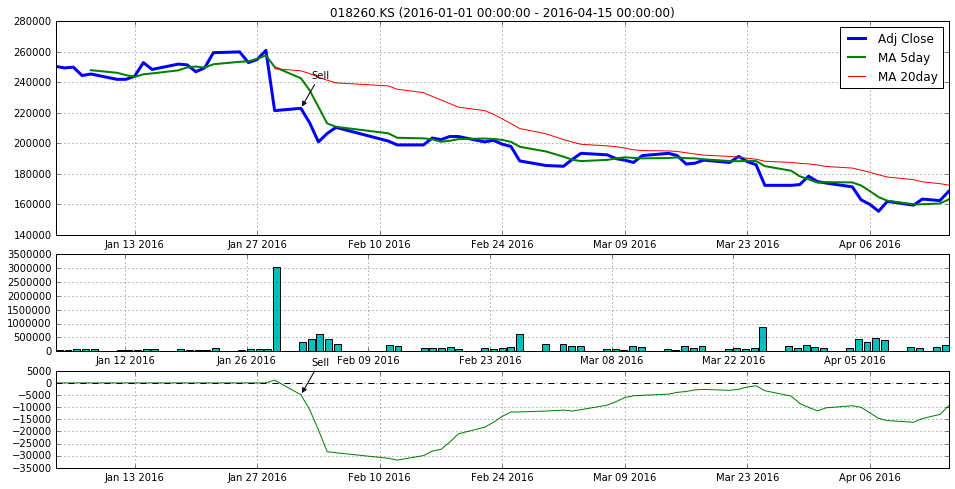

In [6]:
df = df[df.Volume > 0]

#df['MA_5'] = pd.stats.moments.rolling_mean(df['Adj Close'], 5)
df['MA_5'] = df['Adj Close'].rolling(5).mean()
df['MA_20'] = df['Adj Close'].rolling(20).mean()
df['diff'] = df['MA_5'] - df['MA_20']
df = df[['Volume', 'Adj Close', 'MA_5', 'MA_20', 'diff']]

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 8)

# price (가격)
price_chart = plt.subplot2grid((4,1), (0, 0), rowspan=2)
price_chart.plot(df.index, df['Adj Close'], label='Adj Close', lw=3)
price_chart.plot(df.index, df['MA_5'], label='MA 5day' , lw=2)
price_chart.plot(df.index, df['MA_20'], label='MA 20day', lw=1)
price_chart.grid(True)

plt.title(stock_code + " (" + str(start) + " - " + str(end) + ")")
plt.legend(loc='best')

# volume (거래량)
vol_chart = plt.subplot2grid((4,1), (2,0), rowspan=1)
vol_chart.bar(df.index, df['Volume'], color='c')
vol_chart.grid(True)

# 이동평균의 차이
signal_chart = plt.subplot2grid((4,1), (3,0), rowspan=1)
signal_chart.plot(df.index, df['diff'].fillna(0), color='g')
plt.axhline(y=0, linestyle='--', color='k')
signal_chart.grid(True)

# sell, buy annotate
prev_key = prev_val = 0

# Sell/Buy 시그널 Annotation
def annote_signal(chart, xy, text):
    textcoords='offset points'
    arrowprops=dict(arrowstyle='-|>')
    if text == 'Buy':
        xytext=(10,-30)
    elif text == 'Sell':
        xytext=(10,30)
    else:
        return
    chart.annotate(text, xy=xy, xytext=xytext, textcoords=textcoords, arrowprops=arrowprops)

for key, val in df['diff'].iteritems():
    if val == 0:
        continue
    if val * prev_val < 0 and val > prev_val:
        annote_signal(signal_chart, (key, df['diff'][key]), 'Buy')
    elif val * prev_val < 0 and val < prev_val:
        annote_signal(signal_chart, (key, df['diff'][key]), 'Sell')
    prev_key, prev_val = key, val
          
for key, val in df['diff'].iteritems():
    if val == 0:
        continue
    if val * prev_val < 0 and val > prev_val:
        annote_signal(price_chart, (key, df['Adj Close'][key]), 'Buy')
    elif val * prev_val < 0 and val < prev_val:
        annote_signal(price_chart, (key, df['Adj Close'][key]), 'Sell')
    prev_key, prev_val = key, val
    
    
plt.savefig(stock_code + '.png', bbox_inches='tight')
        

In [59]:
import telegram
favisbot = telegram.Bot(token='201142916:AAEBvuAYEXCKFe6Ql_DdkBk6V3Y3G6CdIZU')
chat_id = 185388733
# post image file from disk
favisbot.sendPhoto(chat_id=chat_id, photo=open(stock_code + '.png', 'rb'))

In [12]:
from msgbot.favisbot import favisbot
bot = favisbot()
bot.whisper('plain','hahaha')

msgtype is not allowed null or empty. [plain|html|imglink|img]


NameError: name 'chat_id' is not defined